<a href="https://colab.research.google.com/github/randaama/kmc/blob/main/Copy_of_assignment_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [ ]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 9.36 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/kmc/data/airbnb_hw.csv")

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [ ]:
df["price"] = df['Price'].str.replace(',','').astype(float)
df['beds'] = df["Beds"].fillna(1)
df['num_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

df = df[['price','beds','num_reviews','score']]

def maxmin(z):
    z = (z-z.min())/(z.max()-z.min())
    return z

df = df.dropna()


In [ ]:
X = df.apply(maxmin)
X = df.drop('price',axis=1)

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, max_iter=300, n_init =10,  random_state=0)
model = model.fit(X)
X['cluster'] = model.labels_

In [ ]:
X.describe()

,beds,num_reviews,score,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,1.556985,16.505439,91.993230,2.783796
std,1.043273,24.308241,8.850373,1.590920
min,0.000000,1.000000,20.000000,0.000000
25%,1.000000,2.000000,89.000000,2.000000
50%,1.000000,7.000000,94.000000,4.000000
75%,2.000000,20.000000,100.000000,4.000000
max,16.000000,257.000000,100.000000,5.000000


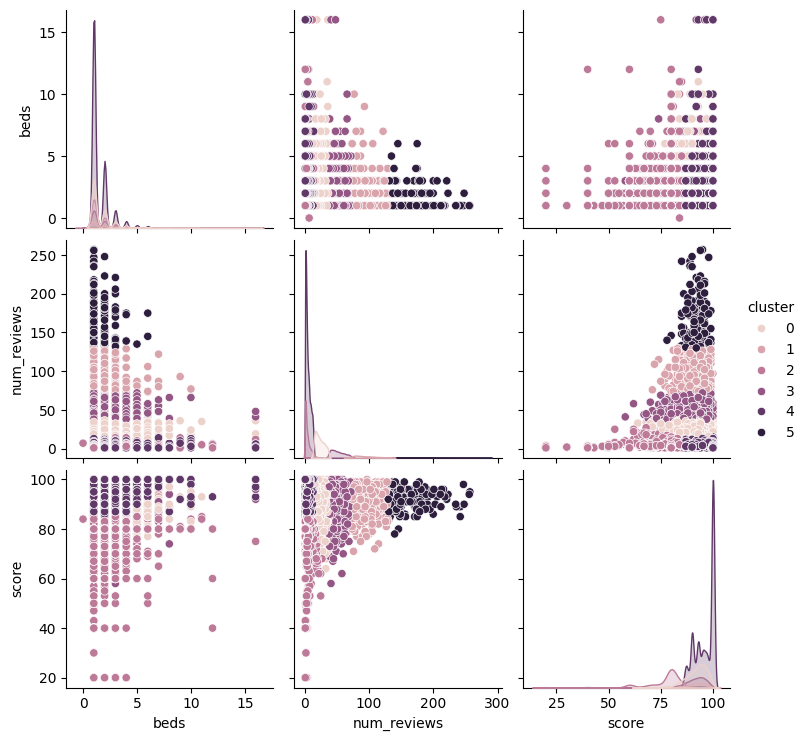

In [ ]:
sns.pairplot(data=X,hue='cluster')

In [ ]:
df['cluster'] = model.labels_
df[['price','cluster']].groupby('cluster').describe()

price                                                            
           count        mean         std   min   25%    50%     75%      max
cluster                                                                     
0         4273.0  161.712380  193.531253  20.0  88.0  135.0  195.00  10000.0
1          748.0  134.442513   84.012800  27.0  80.0  110.0  165.00    875.0
2         2921.0  138.445395  160.800989  21.0  70.0  105.0  170.00   5000.0
3         1913.0  147.085729   96.057748  22.0  89.0  125.0  180.00   1500.0
4        12154.0  159.088777  137.526698  10.0  85.0  130.0  195.00   4500.0
5          146.0  126.171233   71.032519  33.0  79.0  112.5  163.75    550.0

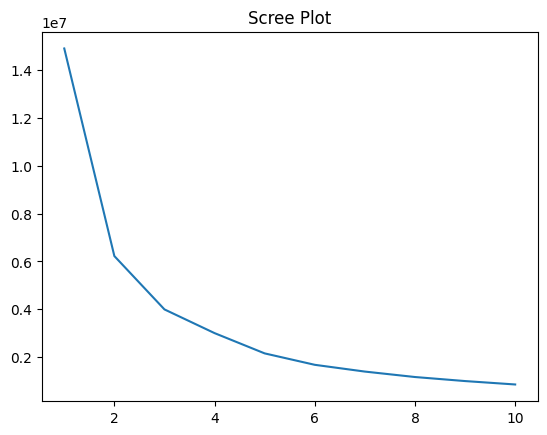

In [ ]:
k_bar = 10
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KMeans(n_clusters=k+1,max_iter=300, n_init=10,random_state=0)
  model = model.fit(X)
  SSE[k] = model.inertia_

scree_plot = sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

In [ ]:
model = KMeans(n_clusters=2,max_iter=300, n_init =10,  random_state=0)
model = model.fit(X)
df['cluster'] = model.labels_

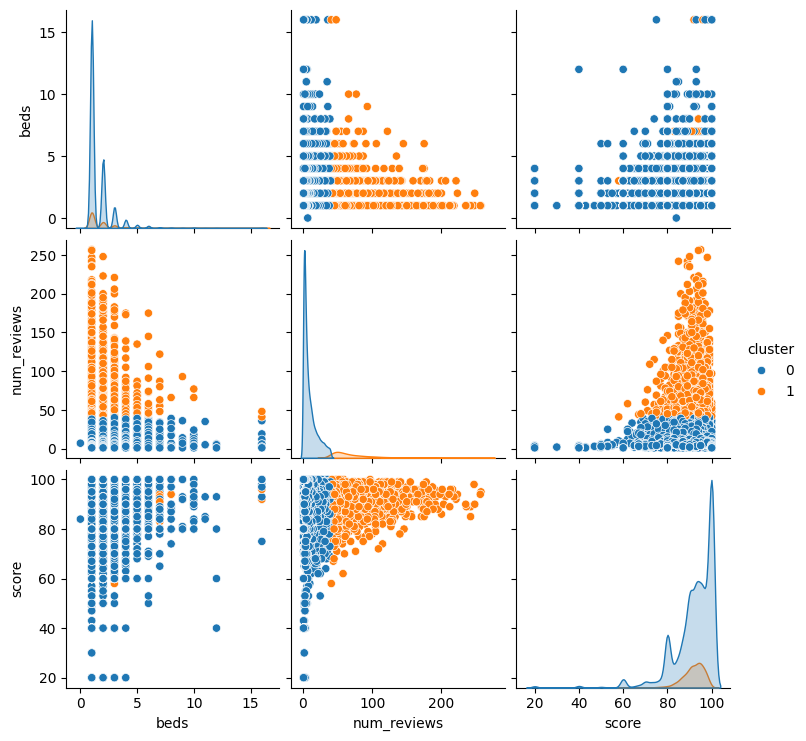

In [ ]:
sns.pairplot(data=df,hue='cluster')

In [ ]:
df['cluster'] = model.labf[['price','cluster']].groupby('cluster').describe()

price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        19623.0  156.422616  154.508552  10.0  85.0  129.0  190.0  10000.0
1         2532.0  142.116509   92.956286  22.0  85.0  120.0  175.0   1500.0

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [ ]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

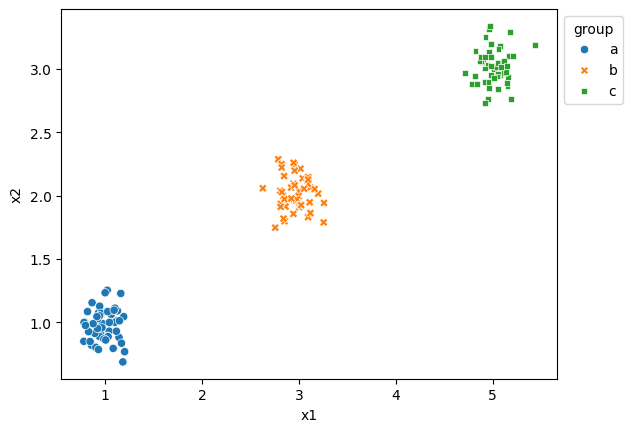

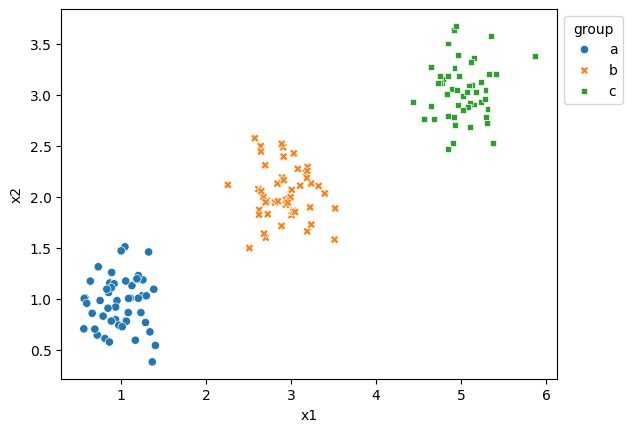

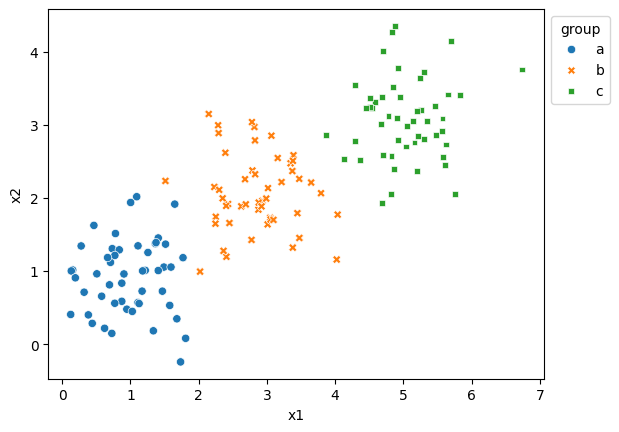

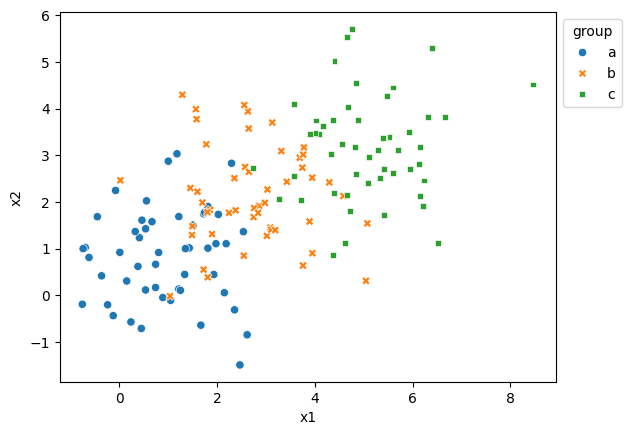

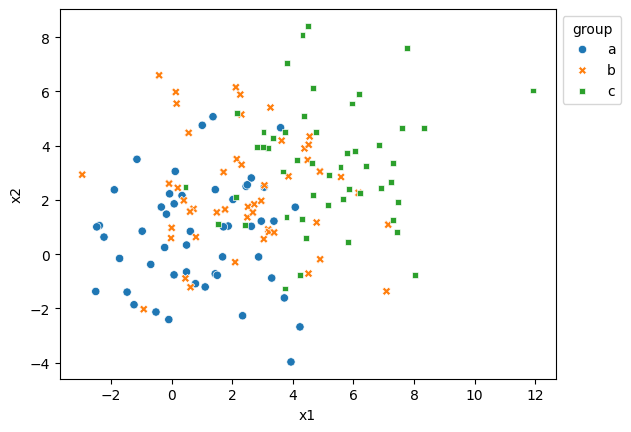

In [ ]:
plot0_125 = sns.scatterplot(data=df0_125,x='x1',y='x2',hue='group',style='group')
sns.move_legend(plot0_125, "upper left", bbox_to_anchor=(1, 1))
plt.show()

plot0_25 = sns.scatterplot(data=df0_25,x='x1',y='x2',hue='group',style='group')
sns.move_legend(plot0_25, "upper left", bbox_to_anchor=(1, 1))
plt.show()

plot0_5 = sns.scatterplot(data=df0_5,x='x1',y='x2',hue='group',style='group')
sns.move_legend(plot0_5, "upper left", bbox_to_anchor=(1, 1))
plt.show()

plot1_0 = sns.scatterplot(data=df1_0,x='x1',y='x2',hue='group',style='group')
sns.move_legend(plot1_0, "upper left", bbox_to_anchor=(1, 1))
plt.show()

plot2_0 = sns.scatterplot(data=df2_0,x='x1',y='x2',hue='group',style='group')
sns.move_legend(plot2_0, "upper left", bbox_to_anchor=(1, 1))
plt.show()

As the noise increases, the different groups get closer and closer together, making it more and more difficult to distinguish them from one another if not for the different colors and shapes. This could spell difficulty in creating an accurate classification model if there is a lot of overlap in the information of the points and which group they are classified into.

In [20]:
def scree(data): # I built a function to make scree plots quickly
    # Preprocess the data:
    X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin) # Normalize the data
    # Create a scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot
    axes.set_ylim(0, 35)

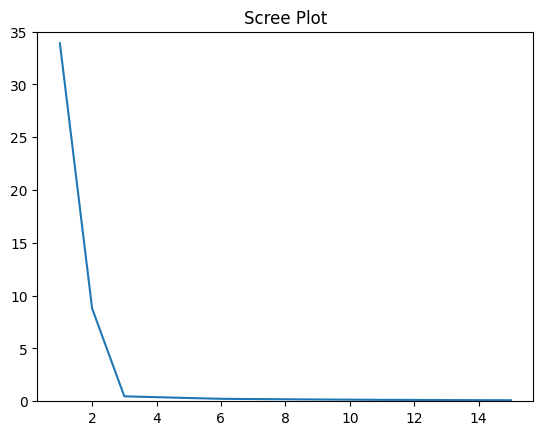

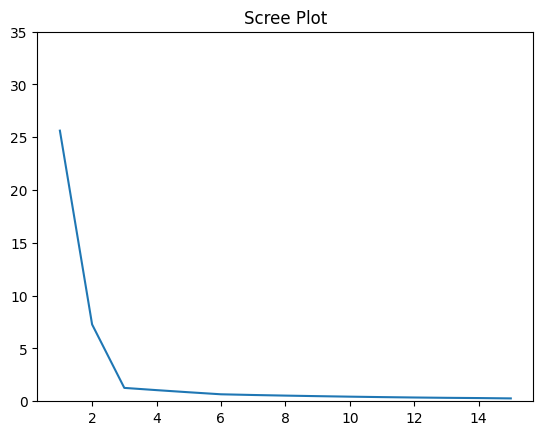

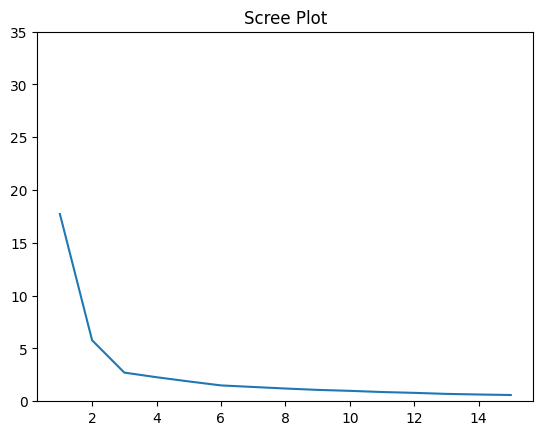

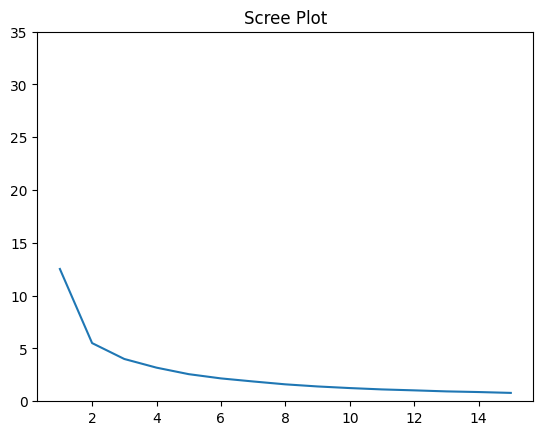

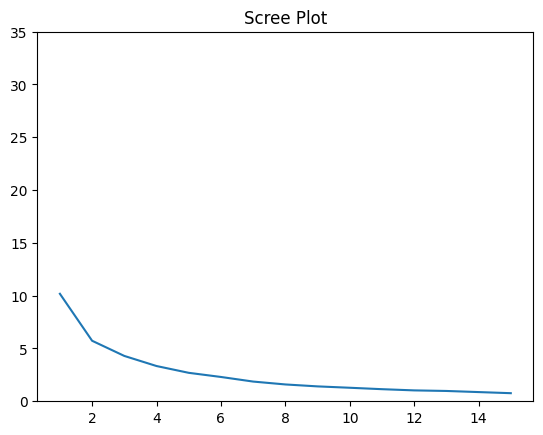

In [21]:
scree(df0_125)
plt.show()

scree(df0_25)
plt.show()

scree(df0_5)
plt.show()

scree(df1_0)
plt.show()

scree(df2_0)
plt.show()

As the amount of noise increases, the presence of a distinguishable elbow decreases more and more. The elbow blends in more with the rest of the graph, which makes it harder to choose the right k.

When groups are more distinct (when there is less noise), the effect of a different k is more visible and it is easier to see if a specific k is better for a dataset, which shows up as a more distinct elbow drop on the graph.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?